In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import re
import nltk # Natural Language Tool Kit
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Transport.csv')

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


In [5]:
df.shape

(444, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [7]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

In [9]:
print(df.dtypes)

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [11]:
df.describe(include=['object']).T

,count,unique,top,freq
Gender,444,2,Male,316
Transport,444,2,Public Transport,300


In [12]:
df.corr()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358
Work Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000


<AxesSubplot:>

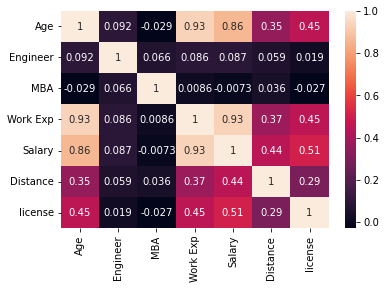

In [13]:
corr=df.corr()
sns.heatmap(corr,ax=plt.subplot(),annot=True)

In [14]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(444, 9)


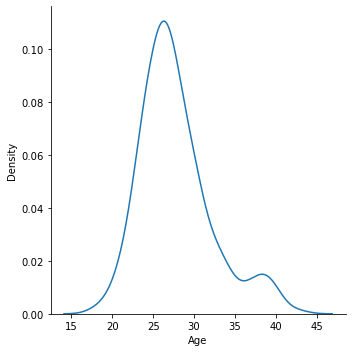

In [15]:
sns.displot(data=df, x='Age',kind='kde')

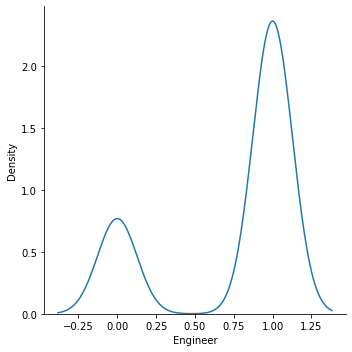

In [16]:
sns.displot(data=df, x='Engineer',kind='kde')

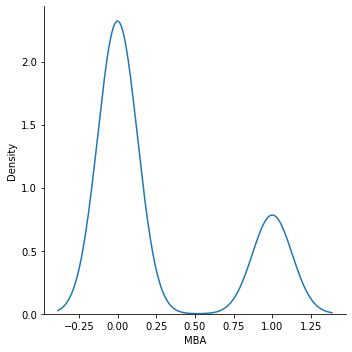

In [17]:
sns.displot(data=df, x='MBA',kind='kde')

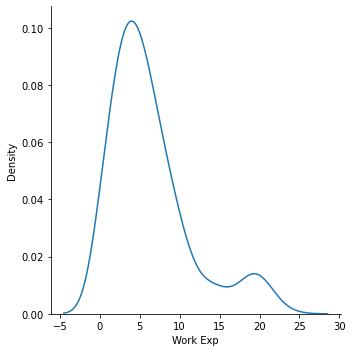

In [18]:
sns.displot(data=df, x='Work Exp',kind='kde')

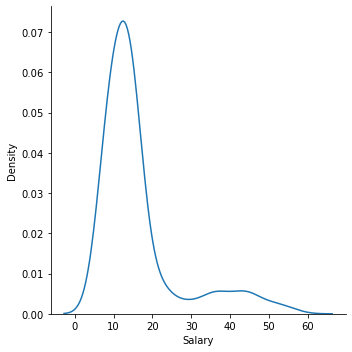

In [19]:
sns.displot(data=df, x='Salary',kind='kde')

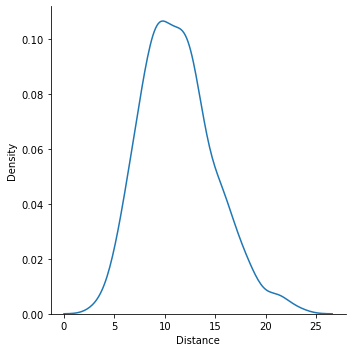

In [20]:
sns.displot(data=df, x='Distance',kind='kde')

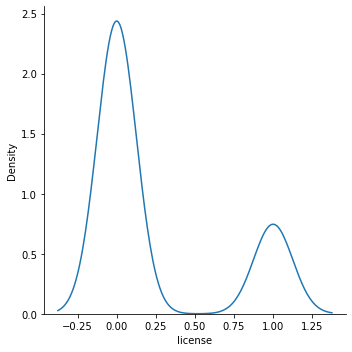

In [21]:
sns.displot(data=df, x='license',kind='kde')

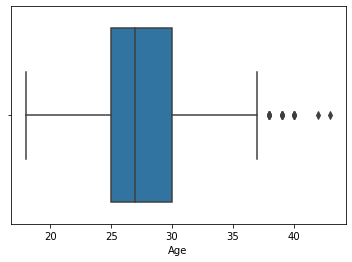

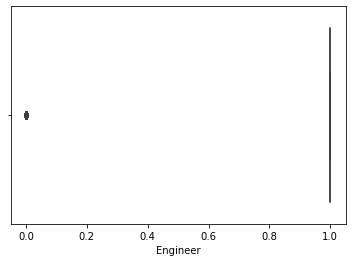

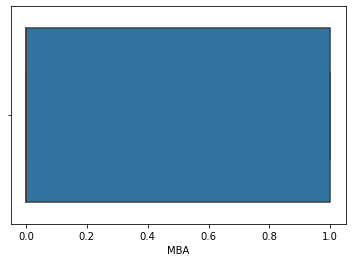

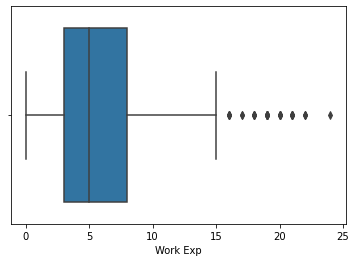

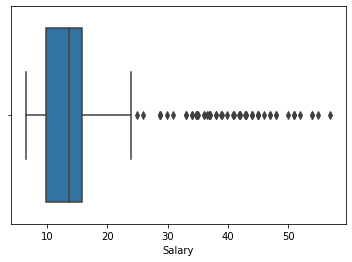

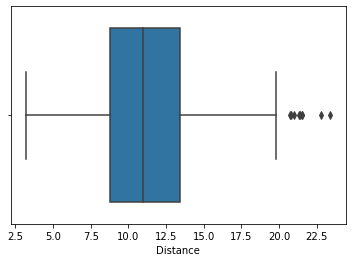

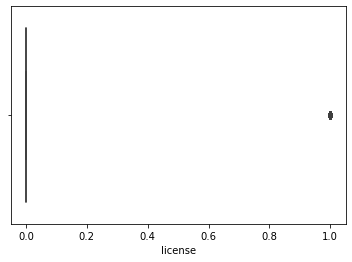

In [22]:
cols = ['Age','Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license' ]

for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in df[cols].columns:
    linear,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<linear,linear,df[column])

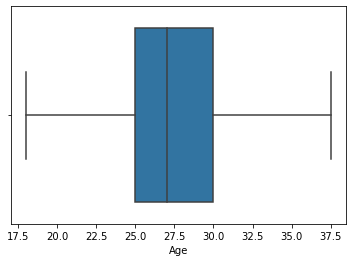

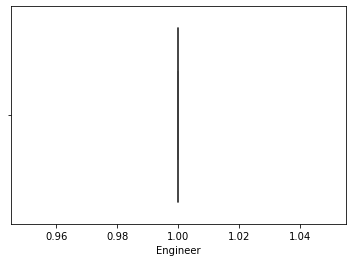

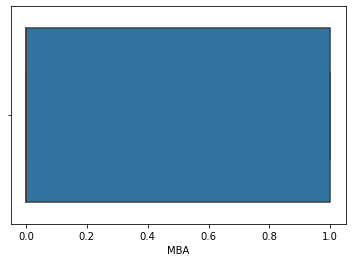

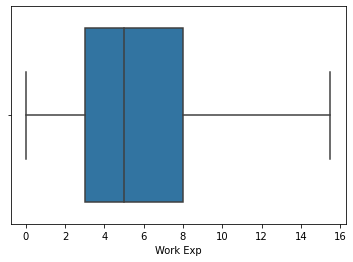

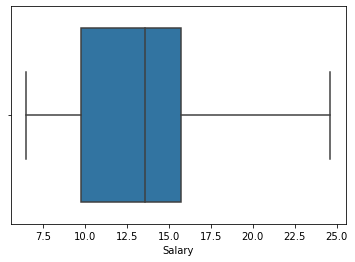

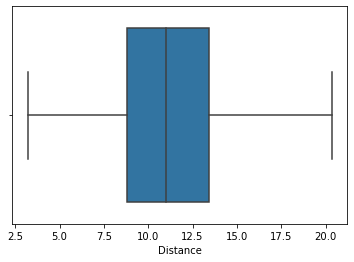

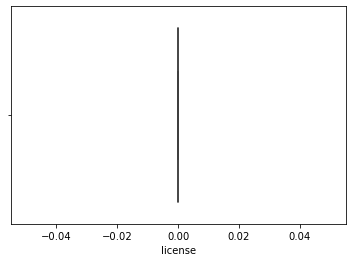

In [25]:
cols = ['Age','Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license' ]

for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

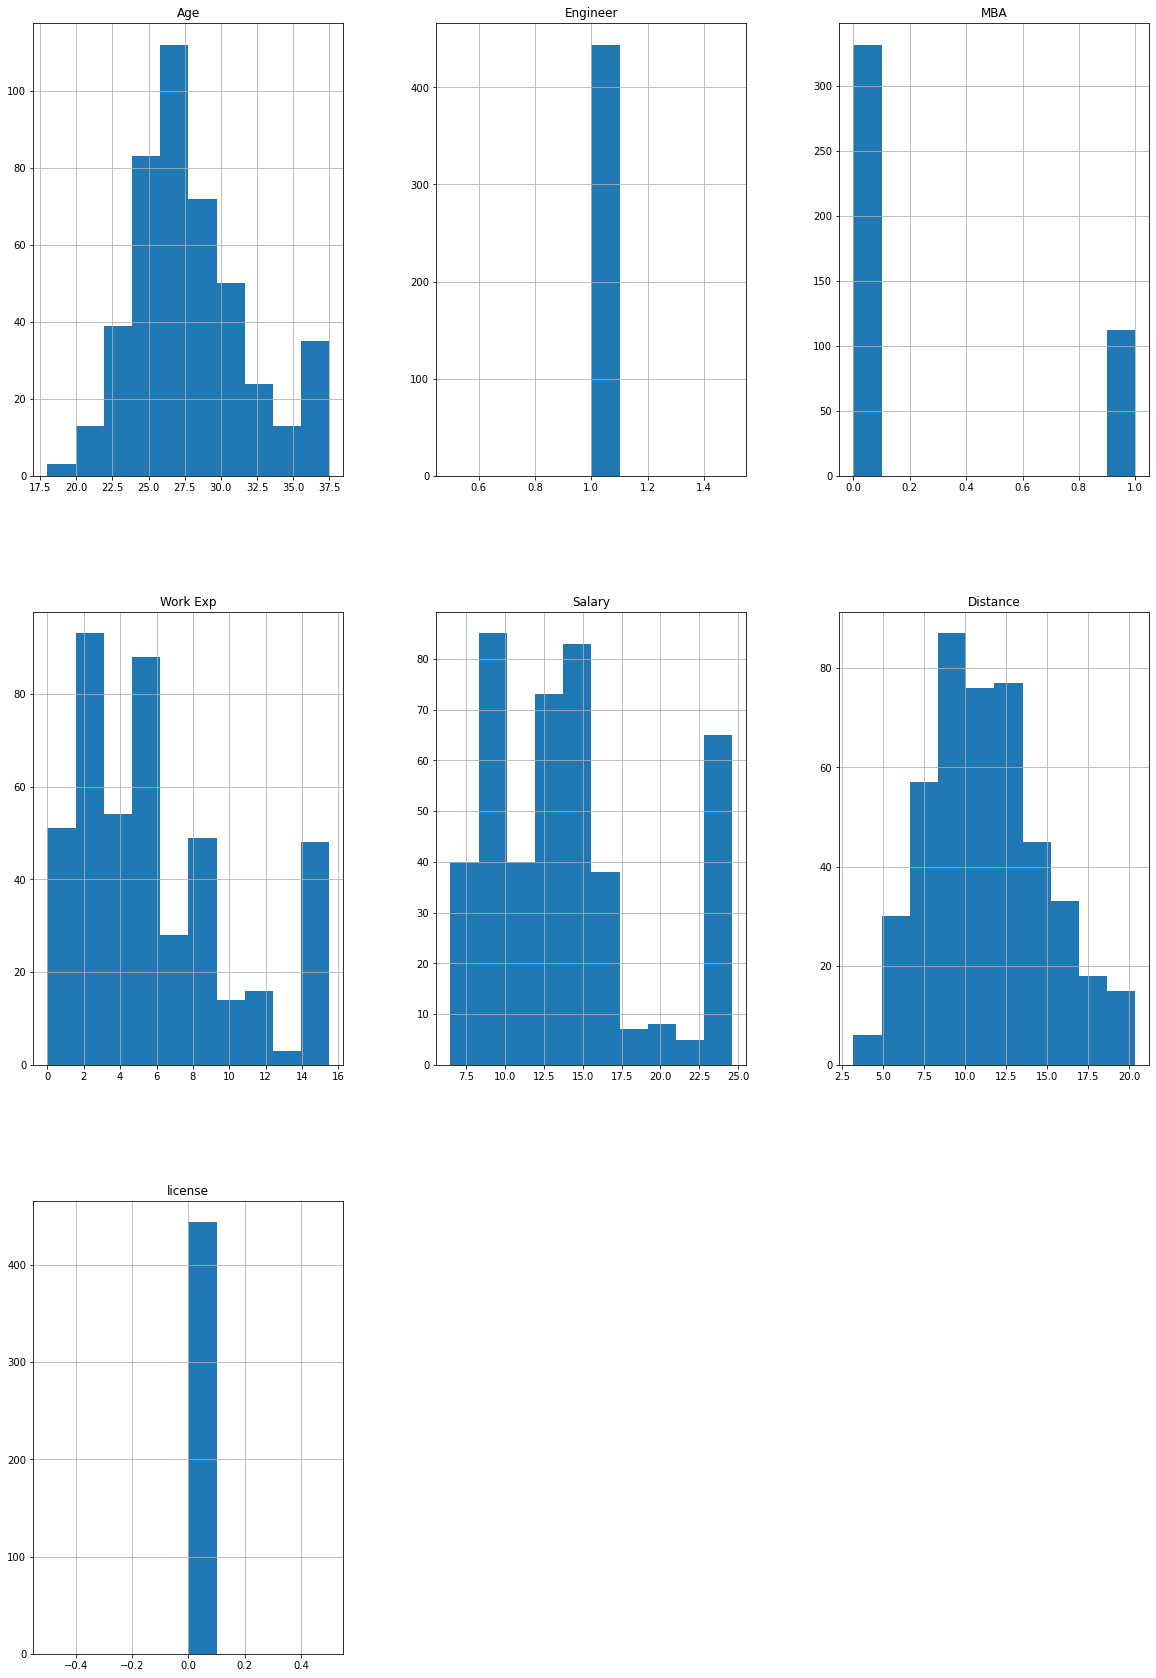

In [26]:
df.hist(figsize=(20,30));

In [27]:
df.skew()

Age         0.710979
Engineer    0.000000
MBA         1.144763
Work Exp    0.843610
Salary      0.800178
Distance    0.423135
license     0.000000
dtype: float64

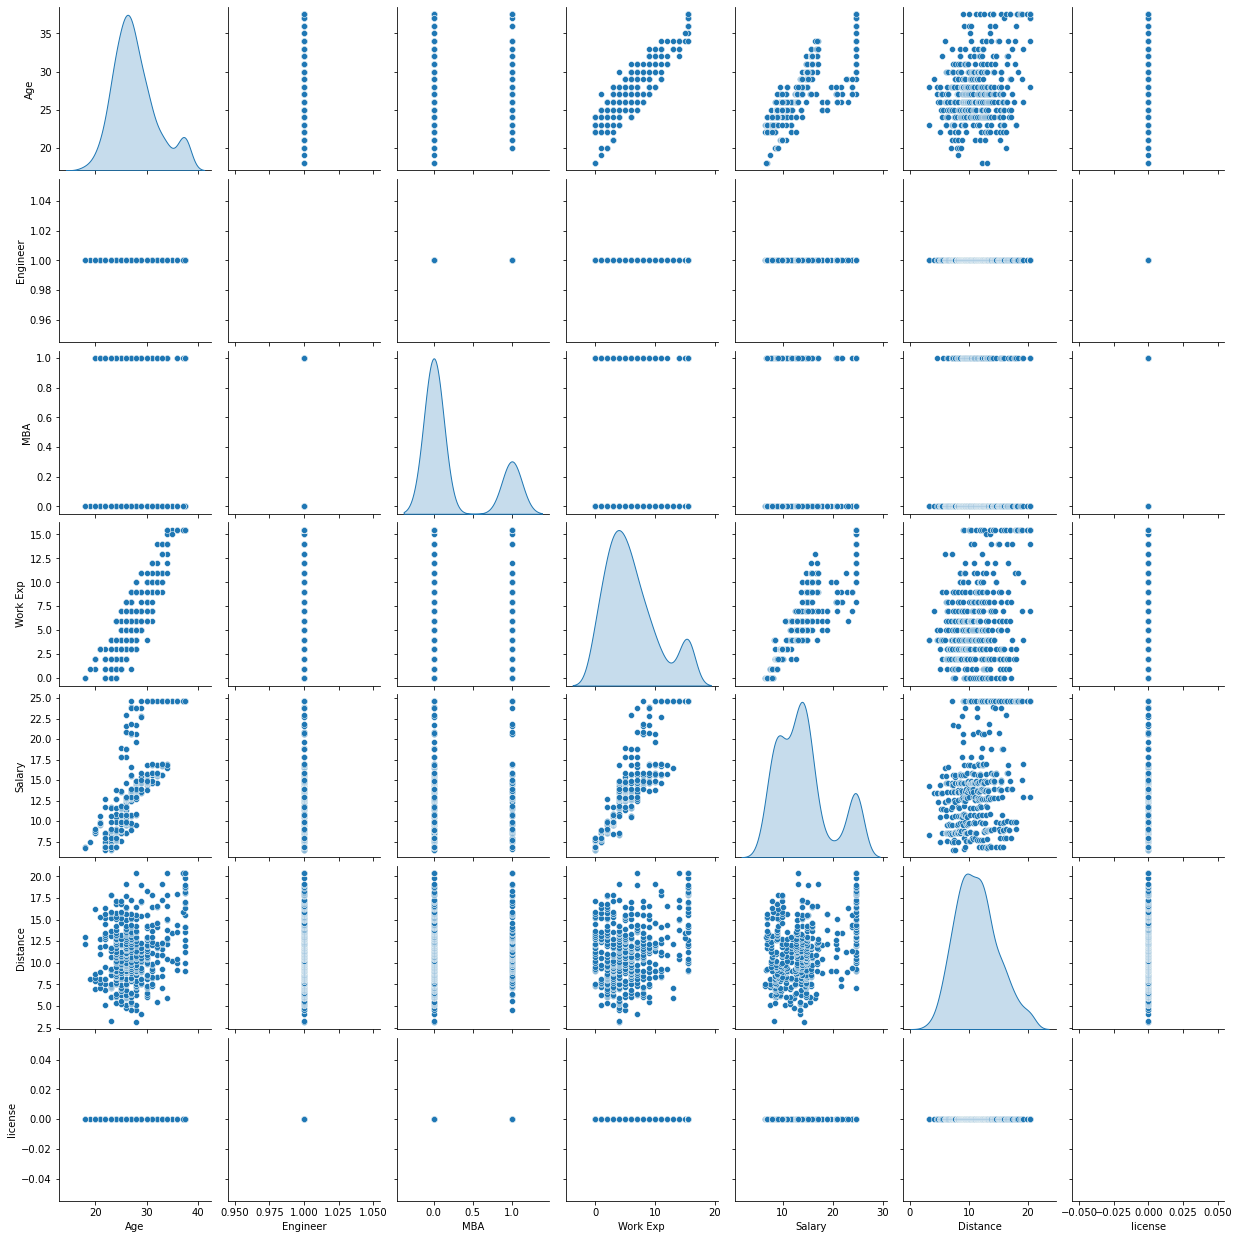

In [28]:
sns.pairplot(data=df, diag_kind='kde')

<AxesSubplot:xlabel='Gender', ylabel='count'>

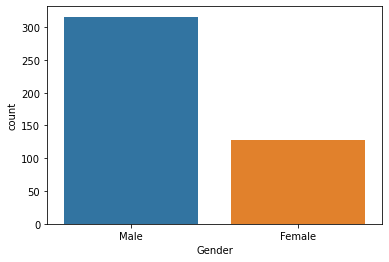

In [29]:
sns.countplot(df['Gender'],order=df['Gender'].value_counts().index) 

<AxesSubplot:xlabel='Transport', ylabel='count'>

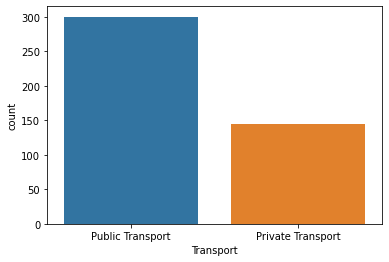

In [30]:
sns.countplot(df['Transport'],order=df['Transport'].value_counts().index) 

In [31]:
gen=[]
for x in df['Gender']:
    if x=="Male":
        gen.append(1)
    else:
        gen.append(0)
df['Gender']=gen
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,1,1.0,0.0,4.0,14.3,3.2,0.0,Public Transport
1,23.0,0,1.0,0.0,4.0,8.3,3.3,0.0,Public Transport
2,29.0,1,1.0,0.0,7.0,13.4,4.1,0.0,Public Transport
3,28.0,0,1.0,1.0,5.0,13.4,4.5,0.0,Public Transport
4,27.0,1,1.0,0.0,4.0,13.4,4.6,0.0,Public Transport
5,26.0,1,1.0,0.0,4.0,12.3,4.8,0.0,Public Transport
6,28.0,1,1.0,0.0,5.0,14.4,5.1,0.0,Private Transport
7,26.0,0,1.0,0.0,3.0,10.5,5.1,0.0,Public Transport
8,22.0,1,1.0,0.0,1.0,7.5,5.1,0.0,Public Transport
9,27.0,1,1.0,0.0,4.0,13.5,5.2,0.0,Public Transport


In [32]:
trans=[]
for y in df["Transport"]:
    if y=="Public Transport":
        trans.append(1)
    else:
        trans.append(0)
df["Transport"]=trans
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,1,1.0,0.0,4.0,14.3,3.2,0.0,1
1,23.0,0,1.0,0.0,4.0,8.3,3.3,0.0,1
2,29.0,1,1.0,0.0,7.0,13.4,4.1,0.0,1
3,28.0,0,1.0,1.0,5.0,13.4,4.5,0.0,1
4,27.0,1,1.0,0.0,4.0,13.4,4.6,0.0,1
5,26.0,1,1.0,0.0,4.0,12.3,4.8,0.0,1
6,28.0,1,1.0,0.0,5.0,14.4,5.1,0.0,0
7,26.0,0,1.0,0.0,3.0,10.5,5.1,0.0,1
8,22.0,1,1.0,0.0,1.0,7.5,5.1,0.0,1
9,27.0,1,1.0,0.0,4.0,13.5,5.2,0.0,1


In [33]:
# Copy all the predictor variables into X dataframe
X = df.drop('Transport', axis=1)

# Copy target into the y dataframe.  
y = df['Transport']

In [34]:
y.value_counts()

1    300
0    144
Name: Transport, dtype: int64

In [35]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [37]:
from sklearn import metrics
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8580645161290322
[[ 71  31]
 [ 13 195]]
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.86      0.94      0.90       208

    accuracy                           0.86       310
   macro avg       0.85      0.82      0.83       310
weighted avg       0.86      0.86      0.85       310



In [38]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.746268656716418
[[23 19]
 [15 77]]
              precision    recall  f1-score   support

           0       0.61      0.55      0.57        42
           1       0.80      0.84      0.82        92

    accuracy                           0.75       134
   macro avg       0.70      0.69      0.70       134
weighted avg       0.74      0.75      0.74       134



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [40]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9483870967741935
[[ 86  16]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       102
           1       0.93      1.00      0.96       208

    accuracy                           0.95       310
   macro avg       0.96      0.92      0.94       310
weighted avg       0.95      0.95      0.95       310



In [41]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7761194029850746
[[25 17]
 [13 79]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        42
           1       0.82      0.86      0.84        92

    accuracy                           0.78       134
   macro avg       0.74      0.73      0.73       134
weighted avg       0.77      0.78      0.77       134



In [42]:
#Logistic Regression
from imblearn.over_sampling import SMOTE

In [43]:
sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [44]:
y_train.value_counts()

1    208
0    102
Name: Transport, dtype: int64

In [45]:
y_train_res.value_counts()

1    208
0    208
Name: Transport, dtype: int64

In [46]:
#This will lead to extreme overfit

In [47]:
# Testing for overfitting

from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [48]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8653846153846154
[[177  31]
 [ 25 183]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       208
           1       0.86      0.88      0.87       208

    accuracy                           0.87       416
   macro avg       0.87      0.87      0.87       416
weighted avg       0.87      0.87      0.87       416



In [49]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6940298507462687
[[28 14]
 [27 65]]
              precision    recall  f1-score   support

           0       0.51      0.67      0.58        42
           1       0.82      0.71      0.76        92

    accuracy                           0.69       134
   macro avg       0.67      0.69      0.67       134
weighted avg       0.72      0.69      0.70       134



In [50]:
# Sampling Strategy is an important parameter to be controlled while using SMOTE

sm = SMOTE(sampling_strategy=.50,random_state=2)

In [51]:
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [52]:
y_train_res.value_counts(1)

1    0.666667
0    0.333333
Name: Transport, dtype: float64

In [53]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [54]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8557692307692307
[[ 72  32]
 [ 13 195]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       104
           1       0.86      0.94      0.90       208

    accuracy                           0.86       312
   macro avg       0.85      0.81      0.83       312
weighted avg       0.86      0.86      0.85       312



In [55]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7388059701492538
[[22 20]
 [15 77]]
              precision    recall  f1-score   support

           0       0.59      0.52      0.56        42
           1       0.79      0.84      0.81        92

    accuracy                           0.74       134
   macro avg       0.69      0.68      0.69       134
weighted avg       0.73      0.74      0.73       134



In [56]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Transport'])
Y=df['Transport']
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
model_ac=[]

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [58]:
LR=model.fit(x_train,y_train)
LR_prob=model.predict_proba(x_test)

In [59]:
LR_ac=model.score(x_test,y_test)*100
model_ac.append(LR_ac)
print("Accuracy LR: ",LR_ac)

Accuracy LR:  77.61194029850746


In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
LDA = model.fit_transform(x_train, y_train)
LDA_prob=model.predict_proba(x_test)
LDA_ac=model.score(x_test,y_test)*100
model_ac.append(LDA_ac)
print("Accuracy LDA: ",LDA_ac)

Accuracy LDA:  77.61194029850746


In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
DTC = model.fit(x_train, y_train)
DTC_prob=model.predict_proba(x_test)
DTC_ac=model.score(x_test,y_test)*100
model_ac.append(DTC_ac)
print("Accuracy DTC: ",DTC_ac)

Accuracy DTC:  73.13432835820896


In [62]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
GNB=model.fit(x_train, y_train)
GNB_prob=model.predict_proba(x_test)
GNB_ac=model.score(x_test,y_test)*100
model_ac.append(GNB_ac)
print("Accuracy GNB: ",GNB_ac)

Accuracy GNB:  81.34328358208955


In [63]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
KNN=model.fit(x_train, y_train)
KNN_prob=model.predict_proba(x_test)
KNN_ac=model.score(x_test,y_test)*100
model_ac.append(KNN_ac)
print("Accuracy KNN: ",KNN_ac)

Accuracy KNN:  81.34328358208955


In [64]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
RFC = model.fit(x_train, y_train)
RFC_prob=model.predict_proba(x_test)
RFC_ac=model.score(x_test,y_test)*100
model_ac.append(RFC_ac)
print("Accuracy RFC: ",RFC_ac)

Accuracy RFC:  76.86567164179104


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
GBC = model.fit(x_train,y_train)
GBC_prob=model.predict_proba(x_test)
GBC_ac=model.score(x_test,y_test)*100
model_ac.append(GBC_ac)
print("Accuracy GBC: ",GBC_ac)

Accuracy GBC:  72.38805970149254


In [66]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
BC = model.fit(x_train,y_train)
BC_prob=model.predict_proba(x_test)
BC_ac=model.score(x_test,y_test)*100
model_ac.append(BC_ac)
print("Accuracy BC: ",BC_ac)

Accuracy BC:  77.61194029850746


In [67]:
# print(LR_prob)
display(y_test)

327    1
233    0
122    1
102    1
71     1
      ..
213    1
416    1
423    0
325    0
403    1
Name: Transport, Length: 134, dtype: int64

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LR_fpr, LR_tpr, LR_thresh = roc_curve(y_test, LR_prob[:,1], pos_label=1)
LDA_fpr, LDA_tpr, LDA_thresh = roc_curve(y_test, LDA_prob[:,1], pos_label=1)
DTC_fpr, DTC_tpr, DTC_thresh = roc_curve(y_test, DTC_prob[:,1], pos_label=1)
GNB_fpr, GNB_tpr, GNB_thresh = roc_curve(y_test, GNB_prob[:,1],pos_label=1)
KNN_fpr, KNN_tpr, KNN_thresh = roc_curve(y_test, KNN_prob[:,1],pos_label=1)
RFC_fpr, RFC_tpr, RFC_thresh = roc_curve(y_test, RFC_prob[:,1],pos_label=1)
GBC_fpr, GBC_tpr, GBC_thresh = roc_curve(y_test,GBC_prob[:,1],pos_label=1)
BC_fpr, BC_tpr, BC_thresh = roc_curve(y_test,BC_prob[:,1],pos_label=1)
random_prob = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_prob, pos_label=1)
print(LR_fpr)
LR_auc_score = roc_auc_score(y_test, LR_prob[:,1])
LDA_auc_score = roc_auc_score(y_test, LDA_prob[:,1])
DTC_auc_score = roc_auc_score(y_test, DTC_prob[:,1])
GNB_auc_score = roc_auc_score(y_test, GNB_prob[:,1])
KNN_auc_score = roc_auc_score(y_test, KNN_prob[:,1])
RFC_auc_score = roc_auc_score(y_test, RFC_prob[:,1])
GBC_auc_score = roc_auc_score(y_test, GBC_prob[:,1])
BC_auc_score = roc_auc_score(y_test, GBC_prob[:,1])
print(LR_auc_score,LDA_auc_score,DTC_auc_score,GNB_auc_score,KNN_auc_score,GBC_auc_score)

[0.         0.         0.         0.02439024 0.02439024 0.07317073
 0.07317073 0.12195122 0.12195122 0.14634146 0.14634146 0.17073171
 0.17073171 0.19512195 0.19512195 0.2195122  0.2195122  0.24390244
 0.24390244 0.26829268 0.26829268 0.29268293 0.29268293 0.34146341
 0.34146341 0.3902439  0.3902439  0.41463415 0.41463415 0.46341463
 0.46341463 0.48780488 0.48780488 0.56097561 0.56097561 0.58536585
 0.58536585 0.6097561  0.6097561  0.68292683 0.68292683 0.70731707
 0.70731707 0.82926829 0.82926829 0.85365854 0.85365854 0.90243902
 0.95121951 1.        ]
0.7390506163126147 0.7369525308156307 0.7178075006556517 0.7996328350380278 0.7811434565958563 0.7298714922633097


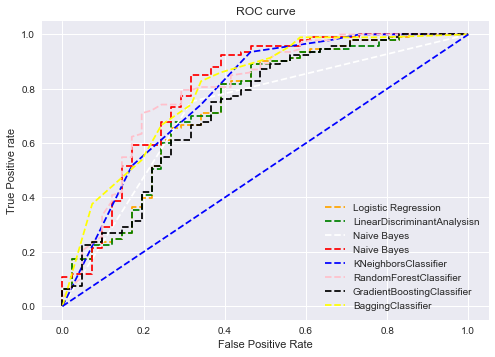

In [69]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(LR_fpr, LR_tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(LDA_fpr, LDA_tpr, linestyle='--',color='green', label='LinearDiscriminantAnalysisn')
plt.plot(DTC_fpr, DTC_tpr, linestyle='--',color='white', label='Naive Bayes')
plt.plot(GNB_fpr, GNB_tpr, linestyle='--',color='red', label='Naive Bayes')
plt.plot(KNN_fpr, KNN_tpr, linestyle='--',color='blue', label='KNeighborsClassifier')
plt.plot(RFC_fpr, RFC_tpr, linestyle='--',color='pink', label='RandomForestClassifier')
plt.plot(GBC_fpr, GBC_tpr, linestyle='--',color='black', label='GradientBoostingClassifier')
plt.plot(BC_fpr, BC_tpr, linestyle='--',color='yellow', label='BaggingClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

([<matplotlib.patches.Wedge at 0x2071671bd90>,
 [Text(1.015467064716632, 0.42287899034568727, 'LR'),
  Text(0.41516106902378996, 1.0186467919583433, 'LDA'),
  Text(-0.4074194561978163, 1.021767775334237, 'DTC'),
  Text(-1.1024596510972702, 0.4739015907363954, 'GNB'),
  Text(-1.003878761209596, -0.44969704556766565, 'KNN'),
  Text(-0.40614248110552165, -1.1291803598369266, 'RFC'),
  Text(0.44206642995892503, -1.0072622655015777, 'GBC'),
  Text(1.0154672230877144, -0.4228786100461053, 'BC')],
 [Text(0.5538911262090719, 0.23066126746128393, '12.6%'),
  Text(0.2264514921947945, 0.555625522886369, '12.6%'),
  Text(-0.22222879428971795, 0.5573278774550383, '11.8%'),
  Text(-0.6431014631400741, 0.27644259459623066, '13.2%'),
  Text(-0.5475702333870524, -0.24528929758236306, '13.2%'),
  Text(-0.23691644731155426, -0.6586885432382071, '12.4%'),
  Text(0.2411271436139591, -0.5494157811826788, '11.7%'),
  Text(0.5538912125932988, -0.2306610600251483, '12.6%')])

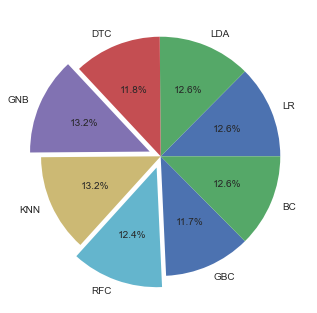

In [70]:
label=["LR","LDA","DTC","GNB","KNN","RFC","GBC","BC"]
plt.pie(model_ac,labels=label,explode=[0,0,0,0.1,0,0.1,0,0],autopct='%1.1f%%')

<BarContainer object of 8 artists>

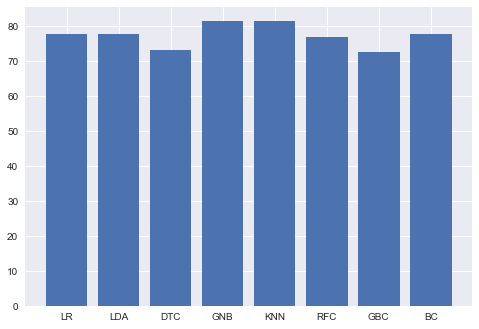

In [71]:
plt.bar(label,model_ac)